#Importing the necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler


In [4]:
data=pd.read_csv("/content/sensor.csv")
data

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,...,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,NaN,231.1921,NORMAL
220316,220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,...,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,NaN,231.1921,NORMAL
220317,220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,...,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,NaN,232.0602,NORMAL
220318,220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,...,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,NaN,234.0856,NORMAL


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

In [6]:
# as our work is related with the time stamp and the any one sensor we are going to choose the sensor_27 which is the best for the next steps as
# it contains the less non-null values than the other sensor data available according to the above info

data['timestamp'] = pd.to_datetime(data['timestamp'])
# Ensuring that is everything in order or not
data = data.sort_values('timestamp')
df = pd.DataFrame({'time-stamp': data['timestamp'], 'sensor': data['sensor_27'].interpolate(method='linear')})
df = df.reset_index(drop=True)
df.head()

,time-stamp,sensor
0,2018-04-01 00:00:00,429.0377
1,2018-04-01 00:01:00,429.0377
2,2018-04-01 00:02:00,454.2390
3,2018-04-01 00:03:00,474.8731
4,2018-04-01 00:04:00,408.8159


In [7]:
# Ensuring the data have atleast the 5000 data points
df.shape

(220320, 2)

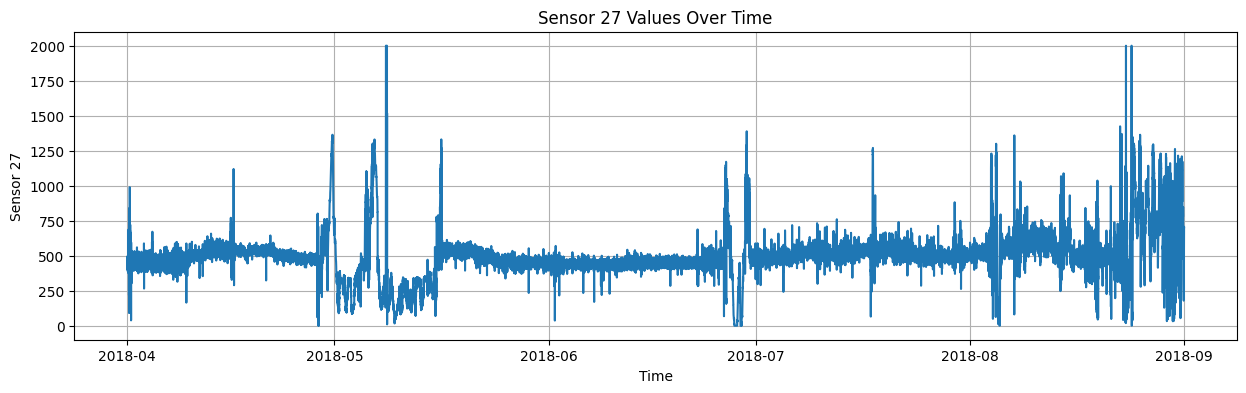

In [8]:
plt.figure(figsize=(15,4))
plt.plot(df['time-stamp'], df['sensor'])
plt.title('Sensor 27 Values Over Time')
plt.xlabel('Time')
plt.ylabel('Sensor 27')
plt.grid(True)
plt.show()


In [9]:
scaler = StandardScaler()
df['scaled'] = scaler.fit_transform(df[['sensor']])
df.head()


,time-stamp,sensor,scaled
0,2018-04-01 00:00:00,429.0377,-0.426733
1,2018-04-01 00:01:00,429.0377,-0.426733
2,2018-04-01 00:02:00,454.2390,-0.278331
3,2018-04-01 00:03:00,474.8731,-0.156823
4,2018-04-01 00:04:00,408.8159,-0.545813


In [10]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.01, random_state=42)
df['iso_anomaly'] = iso.fit_predict(df[['scaled']])
df['iso_anomaly'] = df['iso_anomaly'].map({1: 0, -1: 1})
df.head()

,time-stamp,sensor,scaled,iso_anomaly
0,2018-04-01 00:00:00,429.0377,-0.426733,0
1,2018-04-01 00:01:00,429.0377,-0.426733,0
2,2018-04-01 00:02:00,454.2390,-0.278331,0
3,2018-04-01 00:03:00,474.8731,-0.156823,0
4,2018-04-01 00:04:00,408.8159,-0.545813,0


In [26]:
# let's see the total anomolies using the Isolation Forest technique
df.iso_anomaly.value_counts()

,count
iso_anomaly,
0,218713
1,1607


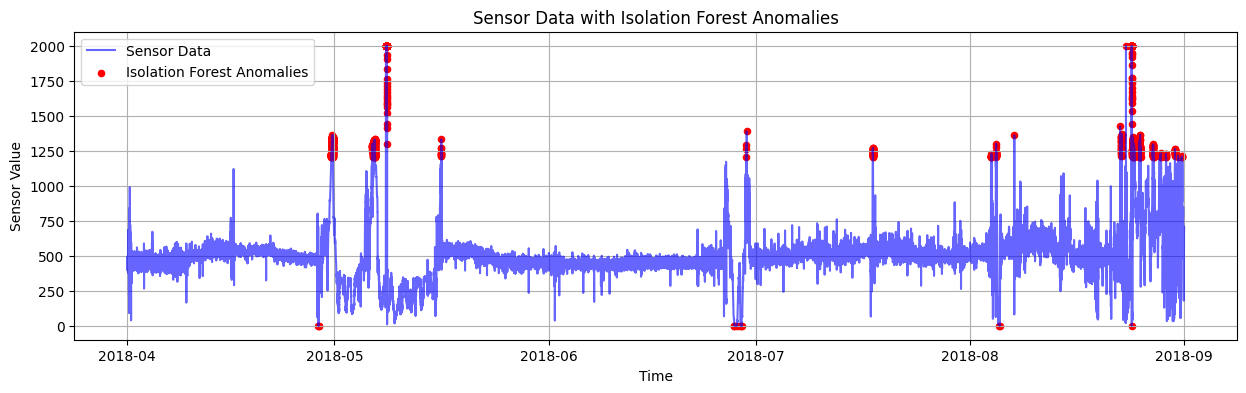

In [11]:
plt.figure(figsize=(15, 4))
plt.plot(df['time-stamp'], df['sensor'], label='Sensor Data', color='blue', alpha=0.6)
plt.scatter(df[df['iso_anomaly'] == 1]['time-stamp'], df[df['iso_anomaly'] == 1]['sensor'], color='red', label='Isolation Forest Anomalies', s=20)
plt.title('Sensor Data with Isolation Forest Anomalies')
plt.xlabel('Time')
plt.ylabel('Sensor Value')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-38-5e45419c310a>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['time_group'] = df['time-stamp'].dt.floor('H')


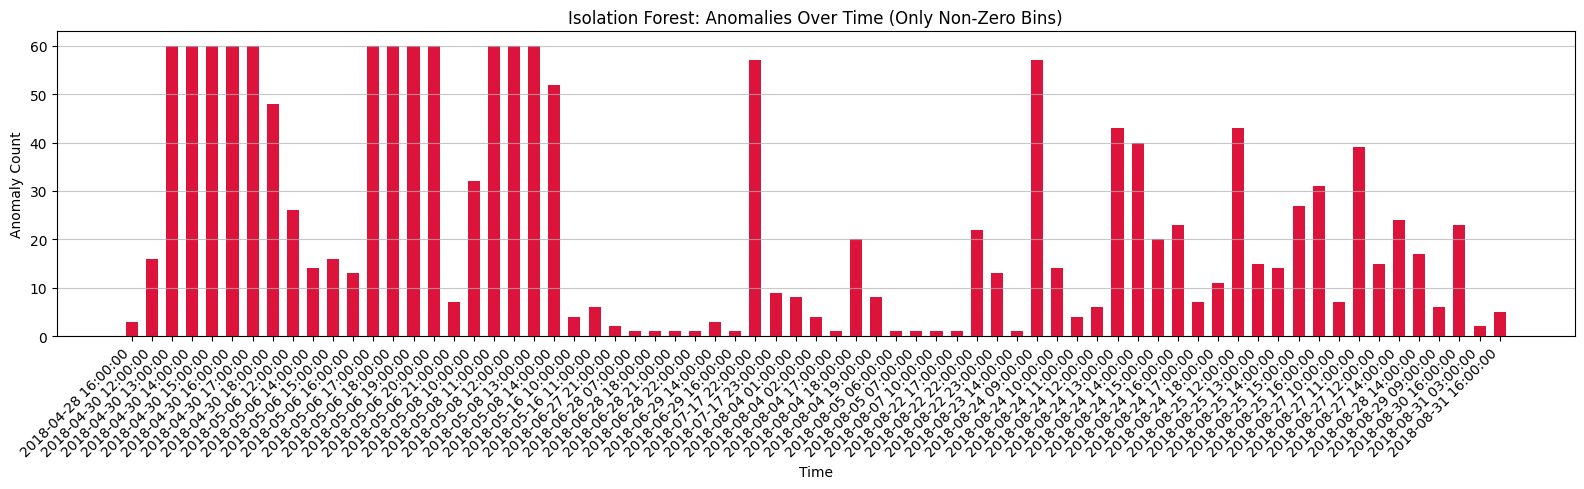

In [38]:
df['time_group'] = df['time-stamp'].dt.floor('H')
iso_summary = df.groupby('time_group')['iso_anomaly'].sum()
iso_summary = iso_summary[iso_summary > 0]
iso_summary = iso_summary.sort_index()

# Plot only meaningful bars
plt.figure(figsize=(16, 5))
bars = plt.bar(iso_summary.index.astype(str), iso_summary.values, color='crimson', width=0.6)
plt.title('Isolation Forest: Anomalies Over Time (Only Non-Zero Bins)')
plt.xlabel('Time')
plt.ylabel('Anomaly Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()



In [20]:
df.head()

,time-stamp,sensor,scaled,iso_anomaly,time_group
0,2018-04-01 00:00:00,429.0377,-0.426733,0,2018-04-01
1,2018-04-01 00:01:00,429.0377,-0.426733,0,2018-04-01
2,2018-04-01 00:02:00,454.2390,-0.278331,0,2018-04-01
3,2018-04-01 00:03:00,474.8731,-0.156823,0,2018-04-01
4,2018-04-01 00:04:00,408.8159,-0.545813,0,2018-04-01


In [21]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
df['lof_anomaly'] = lof.fit_predict(df[['scaled']])
df['lof_anomaly'] = df['lof_anomaly'].map({1: 0, -1: 1})
df.head()


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


,time-stamp,sensor,scaled,iso_anomaly,time_group,lof_anomaly
0,2018-04-01 00:00:00,429.0377,-0.426733,0,2018-04-01,0
1,2018-04-01 00:01:00,429.0377,-0.426733,0,2018-04-01,0
2,2018-04-01 00:02:00,454.2390,-0.278331,0,2018-04-01,1
3,2018-04-01 00:03:00,474.8731,-0.156823,0,2018-04-01,0
4,2018-04-01 00:04:00,408.8159,-0.545813,0,2018-04-01,0


In [27]:
# let's see the total anomolies using the local outlier factor technique
df.lof_anomaly.value_counts()

,count
lof_anomaly,
0,218116
1,2204


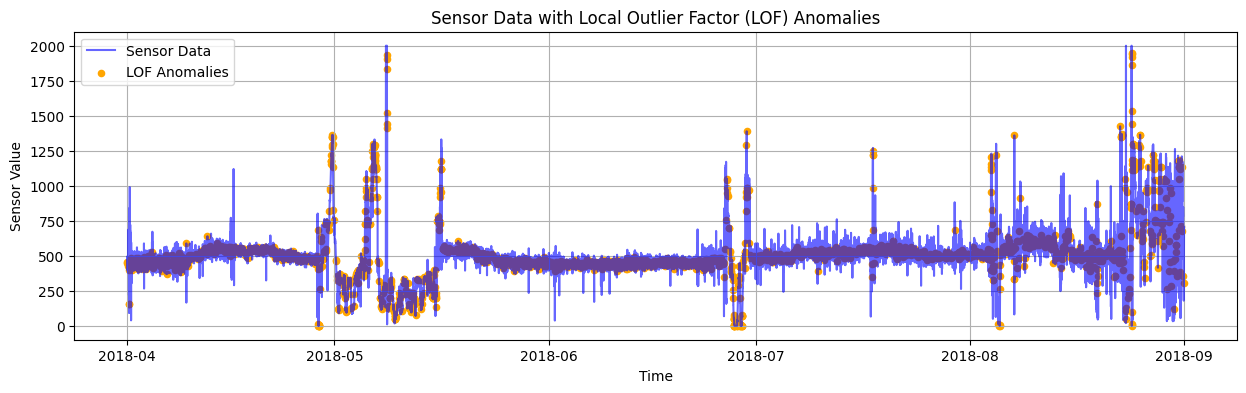

In [22]:
plt.figure(figsize=(15, 4))
plt.plot(df['time-stamp'], df['sensor'], label='Sensor Data', color='blue', alpha=0.6)
plt.scatter(df[df['lof_anomaly'] == 1]['time-stamp'], df[df['lof_anomaly'] == 1]['sensor'], color='orange', label='LOF Anomalies', s=20)
plt.title('Sensor Data with Local Outlier Factor (LOF) Anomalies')
plt.xlabel('Time')
plt.ylabel('Sensor Value')
plt.legend()
plt.grid(True)
plt.show()


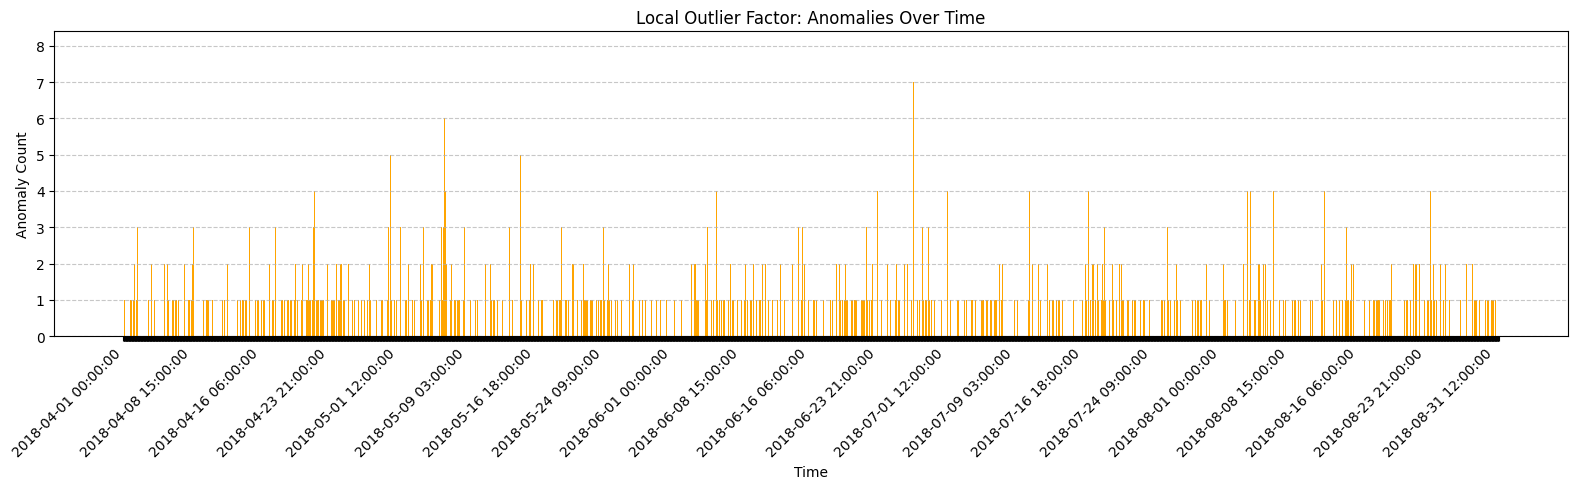

In [29]:
lof_summary = df.groupby('time_group')['lof_anomaly'].sum()
lof_summary = lof_summary.sort_index()



plt.figure(figsize=(16, 5))
bars = plt.bar(lof_summary.index.astype(str), lof_summary.values, color='orange')
plt.title('Local Outlier Factor: Anomalies Over Time')
plt.xlabel('Time')
plt.ylabel('Anomaly Count')
every_nth = max(1, len(lof_summary) // 20)
plt.xticks(ticks=range(len(lof_summary.index)),
           labels=lof_summary.index.astype(str),
           rotation=45, ha='right')
for idx, label in enumerate(plt.gca().get_xticklabels()):
    if idx % every_nth != 0:
        label.set_visible(False)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [30]:
from sklearn.svm import OneClassSVM

svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)
df['svm_anomaly'] = svm.fit_predict(df[['scaled']])
df['svm_anomaly'] = df['svm_anomaly'].map({1: 0, -1: 1})
df.head()


,time-stamp,sensor,scaled,iso_anomaly,time_group,lof_anomaly,svm_anomaly
0,2018-04-01 00:00:00,429.0377,-0.426733,0,2018-04-01,0,0
1,2018-04-01 00:01:00,429.0377,-0.426733,0,2018-04-01,0,0
2,2018-04-01 00:02:00,454.2390,-0.278331,0,2018-04-01,1,0
3,2018-04-01 00:03:00,474.8731,-0.156823,0,2018-04-01,0,0
4,2018-04-01 00:04:00,408.8159,-0.545813,0,2018-04-01,0,0


In [31]:
# let's see the total anomolies using the local outlier factor technique
df.svm_anomaly.value_counts()

,count
svm_anomaly,
0,213020
1,7300


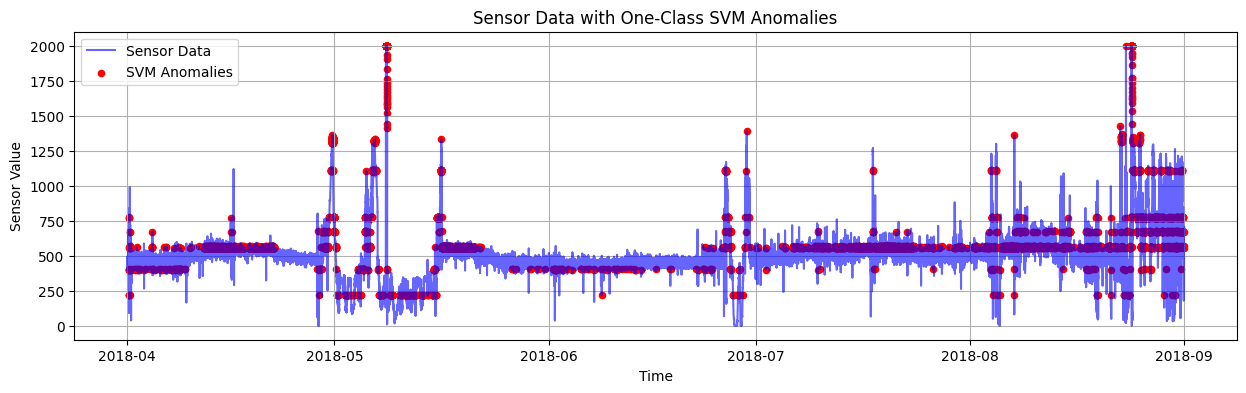

In [33]:
plt.figure(figsize=(15, 4))
plt.plot(df['time-stamp'], df['sensor'], label='Sensor Data', color='blue', alpha=0.6)
plt.scatter(df[df['svm_anomaly'] == 1]['time-stamp'], df[df['svm_anomaly'] == 1]['sensor'], color='red', label='SVM Anomalies', s=20)
plt.title('Sensor Data with One-Class SVM Anomalies')
plt.xlabel('Time')
plt.ylabel('Sensor Value')
plt.legend()
plt.grid(True)
plt.show()


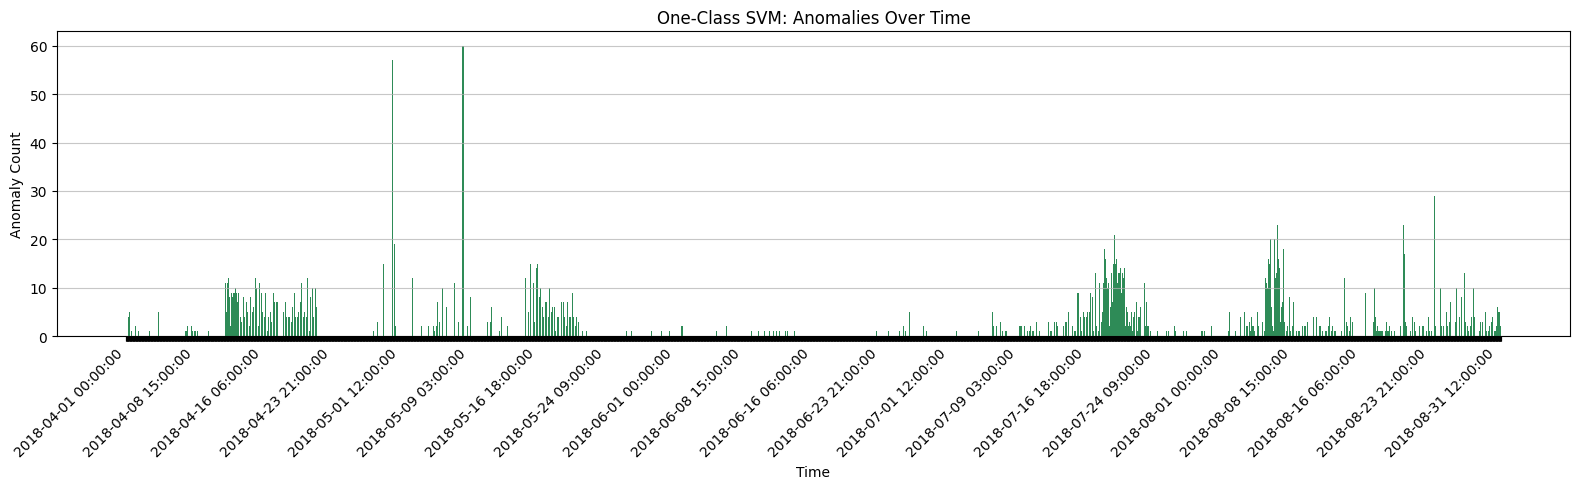

In [40]:
svm_summary = df.groupby('time_group')['svm_anomaly'].sum()
#svm_summary = svm_summary[svm_summary > 0].sort_index()

plt.figure(figsize=(16, 5))
plt.bar(svm_summary.index.astype(str), svm_summary.values, color='seagreen')
plt.title('One-Class SVM: Anomalies Over Time')
plt.xlabel('Time')
plt.ylabel('Anomaly Count')

every_nth = max(1, len(lof_summary) // 20)
plt.xticks(ticks=range(len(lof_summary.index)),
           labels=lof_summary.index.astype(str),
           rotation=45, ha='right')
for idx, label in enumerate(plt.gca().get_xticklabels()):
    if idx % every_nth != 0:
        label.set_visible(False)

plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()
